In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [79]:
# function
def f(x, y):
    return x**4 - 4*x**2 + 2*x +y**2

# partial derivatives
# gradient
def dx_dz(x,y=0):
    return 4*x**3 - 8*x + 2
def dy_dz(y,x=0):
    return 2*y

In [115]:
# other function
def f(x, y):
    return x**2 + y**2

# partial derivatives
# gradient
def dx_dz(x,y=0):
    return 2*x
def dy_dz(y,x=0):
    return 2*y

In [55]:
# Beals function
    # https://www.bing.com/search?q=Beale%27s+function&cvid=62161a4f2bd64a9ab8434fdbfc245aa6&gs_lcrp=EgZjaHJvbWUyBggAEEUYOdIBCDE5OTlqMGo0qAIAsAIA&FORM=ANAB01&adppc=EDGEDBB&PC=EDGEDBB
def f(x,y):
    return (1.5-x+x*y)**2 + (2.25-x+x*y**2)**2 + (2.625-x+x*y**3)**2

# partial derivatives
# gradient
def dx_dz(x,y):
    h=1e-9
    return 0.5 * (f(x+h, y) - f(x-h, y)) / h

def dy_dz(y,x):
    h=1e-9
    return 0.5 * (f(x, y+h) - f(x, y-h)) / h 

In [91]:

# McCormick function
def f(x, y):
    return np.sin(x + y) + (x - y)**2 - 1.5*x + 2.5*y + 1

# Partial derivative with respect to x
def dx_dz(x, y):
    return np.cos(x + y) + 2*(x - y) - 1.5

# Partial derivative with respect to y
def dy_dz(y, x):
    return np.cos(x + y) - 2*(x - y) + 2.5

In [116]:
def gd_journey(x,y,learning_rate, num_iterations):
    z = f(x, y)

    x_jounrey = [x]
    y_jounrey = [y]
    z_jounrey = [z]


    for _ in range(num_iterations):
        xo, yo = x, y
        x -= learning_rate * dx_dz(xo, yo)
        y -= learning_rate * dy_dz(yo, xo)

        x_jounrey.append(x)
        y_jounrey.append(y)
        z_jounrey.append(f(x,y))
    return x_jounrey, y_jounrey, z_jounrey 

In [117]:
# adaptive gradient descent
# partial derivatives
beta2 = 0.9

def dx_dz_adapt(x,y,w, learning_rate):
    w = beta2 * w + (1 - beta2) * dx_dz(x,y)**2
    x -= learning_rate*dx_dz(x,y) / (w**0.5 +1e-5)
    return x,w

def dy_dz_adapt(y,x,w, learning_rate):
    w = beta2 * w + (1 - beta2) * dy_dz(y,x)**2
    y -= learning_rate*dy_dz(y,x) / (w**0.5 +1e-5)
    return y,w

def gd_adapt_journey(x,y,learning_rate, num_iterations):
    z = f(x, y)
    w_x = 0
    w_y = 0

    x_jounrey = [x]
    y_jounrey = [y]
    z_jounrey = [z]

    for _ in range(num_iterations):
        xo, yo = x, y
        x, w_x = dx_dz_adapt(xo,yo,w_x, learning_rate)

        y, w_y = dy_dz_adapt(yo,xo,w_y, learning_rate)

        x_jounrey.append(x)
        y_jounrey.append(y)
        z_jounrey.append(f(x,y))
    return x_jounrey, y_jounrey, z_jounrey


In [121]:
lr = 0.4  # learning rate
max_iter = 20   # maximum number of iterations

xs = 2.5
ys = -3

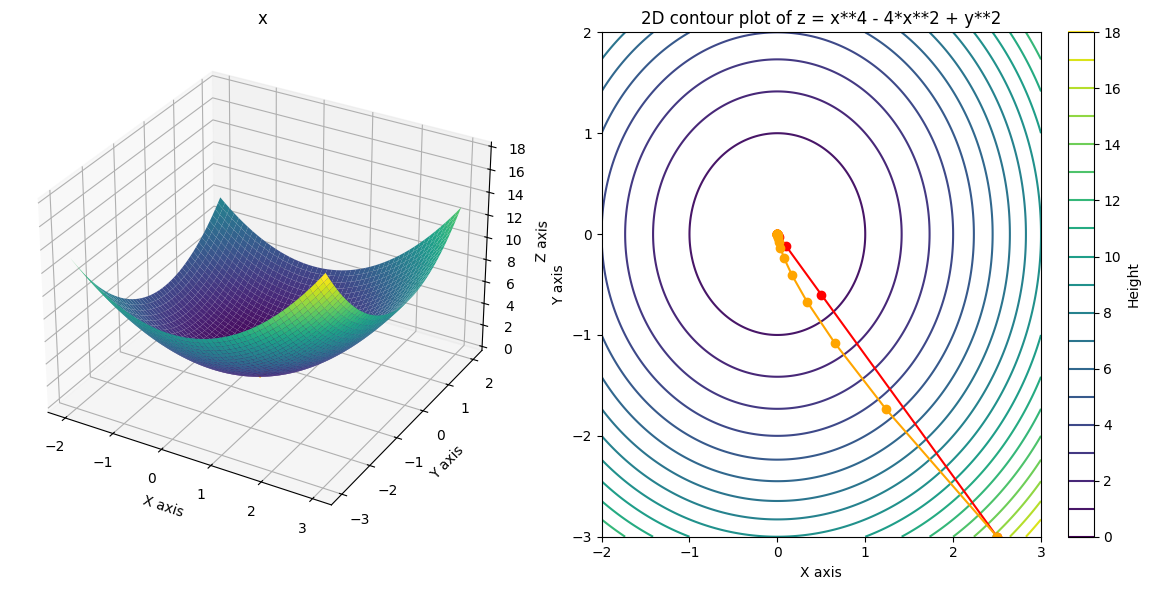

In [122]:
# 3D Visualization
fig = plt.figure(figsize=(12, 6))


# Create a meshgrid for x and y values
x = np.linspace(-2, 3, 400)
y = np.linspace(-3, 2, 400)
x, y = np.meshgrid(x, y)

# Calculate z values
z = f(x, y)

# First subplot for 3D visualization
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax1.set_title('x')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
#ax1.set_zscale('log')  # Set the z-axis to logarithmic scale

# Second subplot for 2D contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(x, y, z, levels=20, cmap='viridis')
ax2.set_title('2D contour plot of z = x**4 - 4*x**2 + y**2')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
plt.colorbar(contour, ax=ax2, orientation='vertical', label='Height')


# Gradient Descent
x_journey, y_journey, z_journey = gd_journey(xs, ys, lr, max_iter)
ax1.plot(x_journey, y_journey, z_journey, color='r')
ax2.plot(x_journey, y_journey, color='r', marker='o')

# Gradient Descent with adaptive learning rate
x_journey, y_journey, z_journey = gd_adapt_journey(xs, ys, lr, max_iter)
ax1.plot(x_journey, y_journey, z_journey, color='orange', linestyle='dashed')
ax2.plot(x_journey, y_journey, color='orange', marker='o')

plt.tight_layout()
plt.show()

In [123]:
print(x_journey)
print(y_journey)
print(z_journey)

[2.5, 1.235096935882052, 0.6508568626886645, 0.3365083407300351, 0.1667413653347431, 0.07828789742393939, 0.03453721879706144, 0.014194924224645342, 0.005382128835184342, 0.0018599485868925599, 0.0005769187470862256, 0.0001574216228329967, 3.676330917359059e-05, 7.061289406337896e-06, 1.0476981525855058e-06, 1.0718566220458131e-07, 5.761000808330736e-09, 1.4767242815004038e-11, -7.588867794740426e-13, 8.215818411843435e-14, -1.3819767979261417e-14]
[-3, -1.7350956025641784, -1.0766598126223559, -0.6689701611448625, -0.4077121270230806, -0.24133055036978443, -0.1378676017423895, -0.07563940662115357, -0.039666460046762116, -0.019783717434268128, -0.009331112985933997, -0.004134444786222512, -0.001707351218988152, -0.0006508485145672236, -0.00022632064990055483, -7.07136909703268e-05, -1.946451545259699e-05, -4.594702483172825e-06, -8.947356994641233e-07, -1.3526031098267185e-07, -1.4237338235130052e-08]
[15.25, 4.536021191062783, 1.5828110078249376, 0.5607589398830647, 0.194031861435378